# 独立成分分析 independent component analysis; ICA
2023/01/06

- 観測信号 $x_1(t), x_2(t), ..., x_M(t)$ は，本来独立な原信号 $s_1(t), s_2(t), ..., s_N(t)$ が混合して観測されると仮定する．

$$
\bm{X} = \bm{A} \bm{S} \in \mathbb{R}^{M \times T}
$$

- 混合行列 $\bm{A}$ の逆行列を推定できれば，信号源 $\bm{S}$ が推定できる．

## 独立と無相関
- **独立** $p(s_1, s_2) = p(s_1)p(s_2)$
  - 2つの信号は完全に独立に発生している．
- **無相関** $\langle \bm{s_1}, \bm{s_2} \rangle = 0$
  - ⇔共分散が0⇔直交
- 独立⇒無相関
  - 逆は必ずしも成り立たない．
  - 観測結果が無相関なだけでは，変数間に依存関係が無いとは限らない．
  - PCAは信号（説明変数）間を無相関にする．
- 参考
  - 減次法によるICAのNumPy実装：https://www.slideshare.net/sfchaos/numpy-scipy-9039097

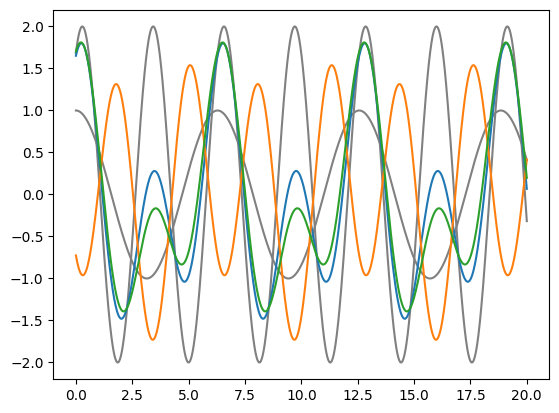

In [102]:
# 信号を用意
import numpy as np
import matplotlib.pyplot as plt

# 時刻
t = np.linspace(0, 20, 1000)

# 原信号
s1 = np.cos(t)
s2 = 2 * np.sin(2 * t + 1)
S = np.c_[s1, s2]

# 混合信号：2つの信号源から3つの観測信号を混成
H = np.random.randn(2, 3)
X = S @ H
# 標準化しておく
X = (X - X.mean(0)) / X.std(0)

plt.plot(t, S, "gray")
plt.plot(t, X)
plt.show()

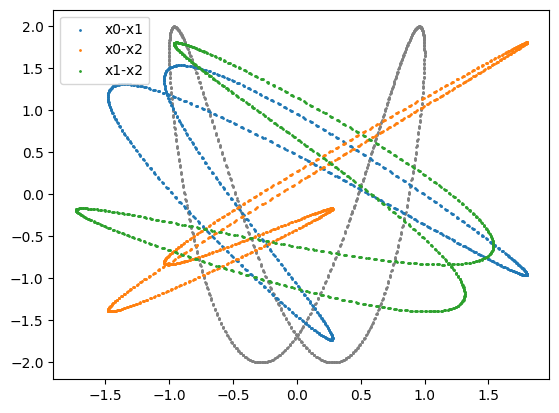

In [103]:
# 信号間の分布
plt.scatter(s1, s2, 1, "gray")
plt.scatter(X[:, 0], X[:, 1], 1, label=f"x{0}-x{1}")
plt.scatter(X[:, 0], X[:, 2], 1, label=f"x{0}-x{2}")
plt.scatter(X[:, 1], X[:, 2], 1, label=f"x{1}-x{2}")
plt.legend()

PCAの場合

In [ ]:
from sklearn.decomposition import PCA, FastICA

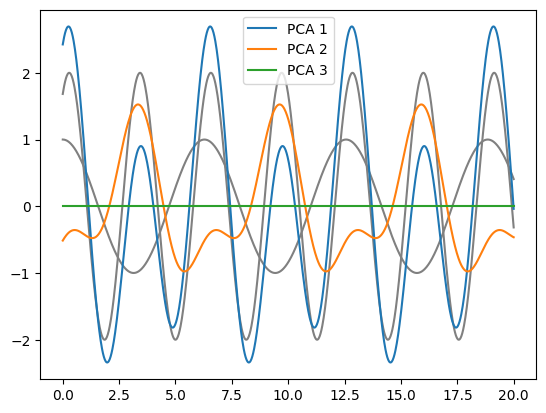

In [104]:
X_pca = PCA().fit_transform(X)

# 2つの成分に圧縮しており，周波数成分もだいたい一致しているが，位相と振幅が違う
plt.plot(t, S, "gray")
plt.plot(t, X_pca, label=["PCA 1", "PCA 2", "PCA 3"])
plt.legend()
plt.show()

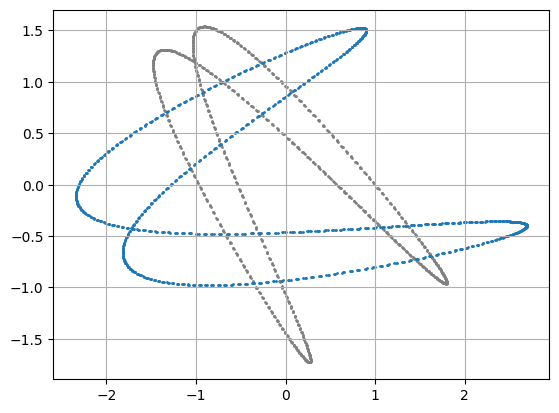

In [105]:
plt.scatter(X[:, 0], X[:, 1], 1, c="gray")
plt.scatter(X_pca[:, 0], X_pca[:, 1], 1)
plt.grid()

ICAの場合

In [126]:
X_pca.std(0)

array([1.54638944e+00, 7.80179283e-01, 1.95918394e-16])

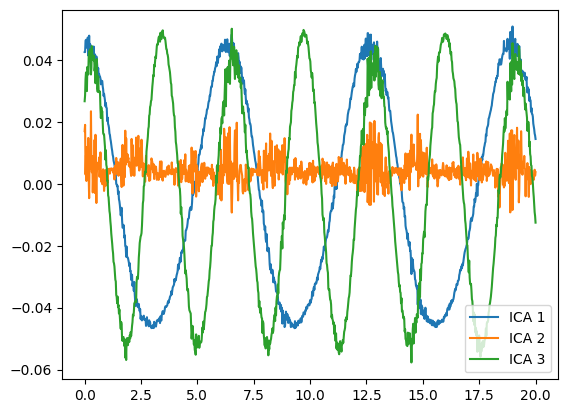

In [132]:
ica = FastICA(whiten="arbitrary-variance")
X_ica = ica.fit_transform(X)

# 2つの成分に圧縮しており，それっぽいが，なんか違う
# plt.plot(t, S, "gray")
plt.plot(t, X_ica, label=["ICA 1", "ICA 2", "ICA 3"])
plt.legend()
plt.show()

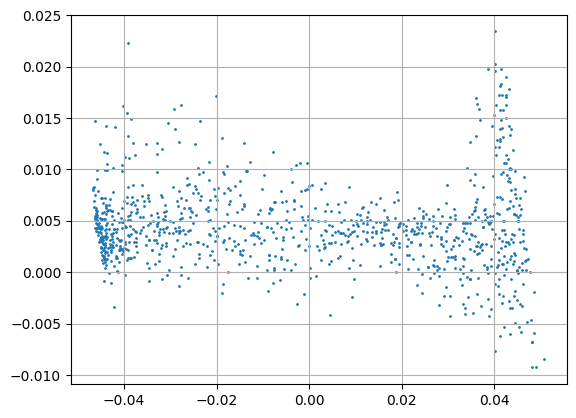

In [136]:
plt.scatter(X_ica[:, 0], X_ica[:, 1], 1)
plt.grid()

In [138]:
ica.components_

array([[ 0.00874388,  0.01188393, -0.01009307],
       [-0.05086892,  0.0101408 ,  0.03155289],
       [-0.06941533,  0.02369904,  0.02345582]])

c:\Users\bqi11\venv311\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


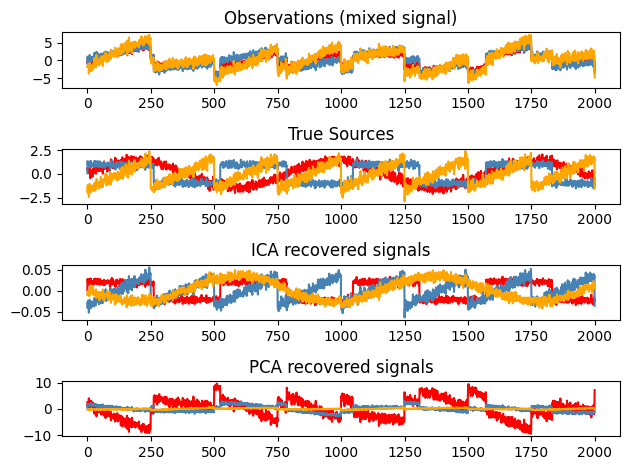

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

# #############################################################################
# サンプルデータを生成する
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # 信号1：正弦波信号
s2 = np.sign(np.sin(3 * time))  # 信号2：方形信号
s3 = signal.sawtooth(2 * np.pi * time)  # 信号3：のこぎり波信号

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  #  ノイズを追加

S /= S.std(axis=0)  # データを標準化する
# データを混合する
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # ミキシングマトリックス
X = np.dot(S, A.T)  # 観測値を生成する

# ICAを計算する
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # 信号を再構築する
A_ = ica.mixing_  # 推定混合行列を取得する

# アンミキシングを元に戻すことで、ICAモデルが適用されることを「証明」できます。
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# 比較のために、PCAを計算します
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # 直交成分に基づいて信号を再構築する

# #############################################################################
# 結果をプロット

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

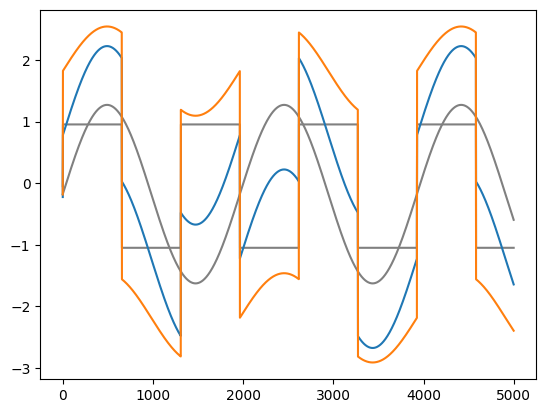

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

N = 5000
t = np.linspace(0, 8, N)
s1 = np.sin(2 * t)
s2 = np.sign(np.sin(3 * t))
S = np.c_[s1, s2]
S = (S - S.mean(0)) / S.std(0)

A = np.array([[1, 1], [0.5, 2]])
X = S @ A.T

plt.plot(S, c="gray")
plt.plot(X)

In [146]:
X.std(0)

array([1.47394453, 2.10297705])

In [ ]:
pca = PCA(whiten=True)
X = pca.fit_transform(X)

In [ ]:

def kurt(Y):
    return torch.mean(Y**4, dim=0) - 3
def kurt_loss(Y):
    # Y の分散共分散が単位行列であることが前提
    return -torch.mean(torch.abs(kurt(Y)))
def ICA(X, loss_func = kurt_loss):
    X = Variable(torch.from_numpy(X), requires_grad =False).float()
    W = Variable((torch.randn((2, 2))), requires_grad =True)
    W.data = W.data / torch.norm(W.data)
    hist_loss = []
    
    for i in range(1000):
        Y = torch.mm(X, W)
        loss = loss_func(Y)
        hist_loss.append(loss.data.numpy())
        loss.backward()

        W.data = W.data - W.grad.data * 0.1
        W.grad.data.zero_()
        W.data = W.data / torch.norm(W.data)
    return Y, W, hist_loss

In [ ]:

from scipy import signal

import torch
from torch.autograd import Variable

